In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('./compression-data.csv', sep=';')

In [12]:
data = data.sort_values('cells')
#data = data[data['cells'] > 0]
data.head()

,cells,bytes,build_duration_nanosec,build_duration_total_nanosec,retr_duration_avg_nanosec,algorithm,table
74,288176,55129640,2335664598,15434106128,217,dedup_hash,main_tokenized_embedding
59,288205,55242576,2457928235,19113037727,215,dedup_hash,main_tokenized
16,288699,54885256,2911245311,21146314556,208,dedup_hash,cocoa_main_tokenized
73,476924,108798048,4464449939,19727347752,228,dedup_hash,main_tokenized_embedding
58,477887,109101472,5155316551,24364439568,228,dedup_hash,main_tokenized


baseline
dedup_btree
dedup_hash
ns


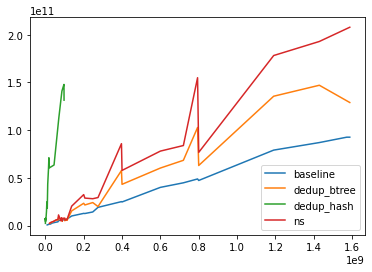

In [24]:
fig, ax = plt.subplots()

for algo,row in data.groupby("algorithm"):
    print(algo)
    p, = ax.plot('cells', 'build_duration_nanosec', data=row)
    p.set_label(algo)

ax.legend()

# fig

the memory footprint is heavily dependant on the dataset at hand.

In [7]:
data[data['algorithm'] == 'dedup_btree']

,cells,bytes,build_duration_nanosec,build_duration_total_nanosec,retr_duration_avg_nanosec,algorithm,table
69,21923951,52268344,2277022597,15835963312,698,dedup_btree,main_tokenized_embedding
54,25376559,52126456,2643159001,18684991598,704,dedup_btree,main_tokenized
10,28196465,52184664,2922032808,21146808534,717,dedup_btree,cocoa_main_tokenized
68,43845661,93771376,4496922544,20263515080,926,dedup_btree,main_tokenized_embedding
53,50769888,93548136,5349529030,24966737924,1086,dedup_btree,main_tokenized
9,56391852,93839944,5792423385,26602578273,898,dedup_btree,cocoa_main_tokenized
67,65771006,131455152,5761336893,22679584435,957,dedup_btree,main_tokenized_embedding
119,68652659,1715295256,8772273153,68619407015,1797,dedup_btree,open_data_mate_main_tokenized
52,76146258,131626520,7136810262,26218562832,939,dedup_btree,main_tokenized
66,78934930,152893784,6933155710,23913198609,981,dedup_btree,main_tokenized_embedding


In [8]:
ax.clear()

#data_mt = data[data['table'] == 'main_tokenized']
data_mt = data
plot_mem(data_mt, 'algorithm', 'ns')
plot_mem(data_mt, 'algorithm', 'baseline')
plot_mem(data_mt, 'algorithm', 'dedup_btree')

ax.legend
ax.set_title("memory footprint of diff. algorithms")

fig

NameError: name 'plot_mem' is not defined